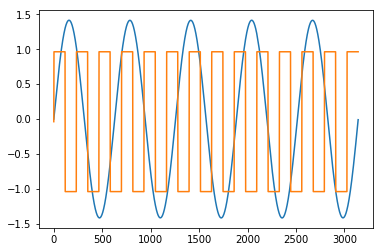

0.35382400000000036


In [4]:
import random
from numpy import *
import matplotlib.pyplot as plt
import copy
import time
def load_data():
    x1=loadtxt('dat1.txt')
    x2=loadtxt('dat2.txt') 
    x1=x1-mean(x1)
    x2=x2-mean(x2)
    X=array([x1,x2]) 
    return X;

def whiten(X):
    xx=dot(X,X.T)
    D,E = linalg.eig(xx)
    D=diag(1/sqrt(D))
    V = dot(D, E.T)
    Z=dot(V,X)
    return Z

def _logcosh(x, fun_args=None, alpha = 1):
    gx = tanh(alpha * x, x); g_x = gx ** 2; g_x -= 1.; g_x *= -alpha
    return gx, g_x.mean(axis=-1)

def do_decorrelation(W):
    s, u = linalg.eigh(dot(W, W.T))
    return dot(dot(u * (1. / sqrt(s)), u.T), W)

def do_fastica(Z):
    n, m = Z.shape; p = float(m); g = _logcosh
    Z *= sqrt(Z.shape[1])
    W = ones((n,n), float32)
    for i in range(n): 
        for j in range(n):
            W[i,j] = random.random()
    maxIter = 200
    for ii in range(maxIter):
        gwtx, g_wtx = g(dot(W, Z))
        W1 = do_decorrelation(dot(gwtx, Z.T) / p - g_wtx[:, newaxis] * W)
        lim = max( abs(abs(diag(dot(W1, W.T))) - 1) )
        W = W1
        if lim < 0.0001:
            break
    return W
start = time.clock()
X=load_data()
Z=whiten(X)
W = do_fastica(Z)
S=dot(W,Z)
plt.plot(S[0])
plt.plot(S[1])
plt.show()

end = time.clock()

print (end-start)


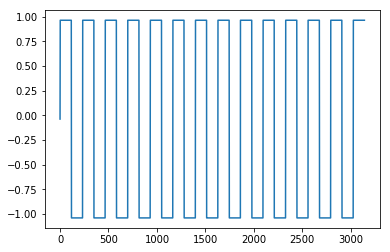

In [4]:
plt.plot(S[0])
plt.show()

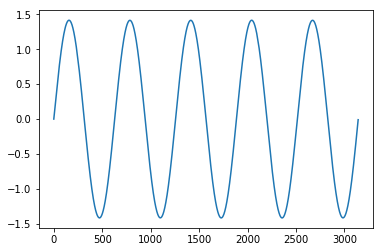

In [5]:
plt.plot(S[1])
plt.show()